### PCA con imágenes

In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
import numpy as np
import pandas as pd
import os

%matplotlib inline
plt.style.use('default')

In [2]:
from functions import *

In [3]:
#Cargamos una imagen
# image = img.imread('data/raw/train/benign/3.jpg')
# image.shape

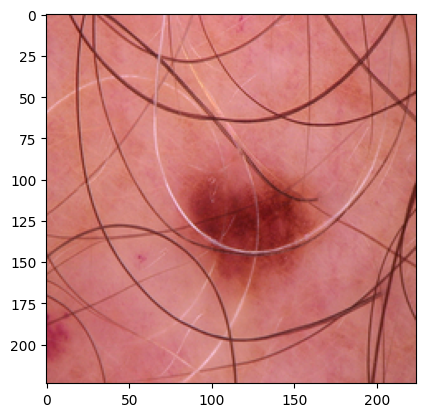

In [4]:
image = cv2.imread('data/raw/train/benign/69.jpg')
plt.imshow(bgr2rgb(image));


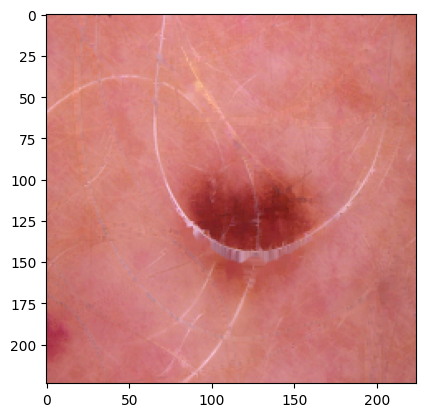

In [5]:
plt.imshow(bgr2rgb(eliminar_vello(image)))
plt.show()

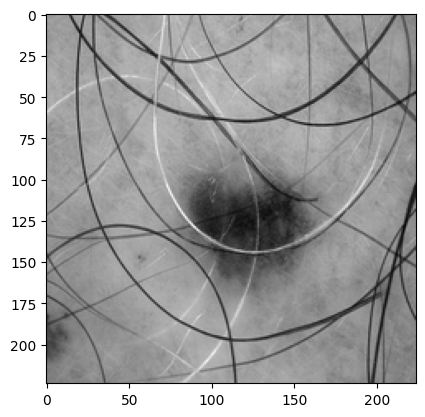

In [20]:
image_gray = cv2.imread('data/raw/train/benign/69.jpg')
image_gray = cv2.cvtColor(image_gray, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray');


In [21]:
image_gray.shape

(224, 224)

In [22]:
image.shape

(224, 224, 3)

In [35]:
# 224*224 = 50176 
# 50176*3 = 150528

# Hay 16725 col por color - Reducir el numero

In [36]:
red, green, blue = cv2.split(image)

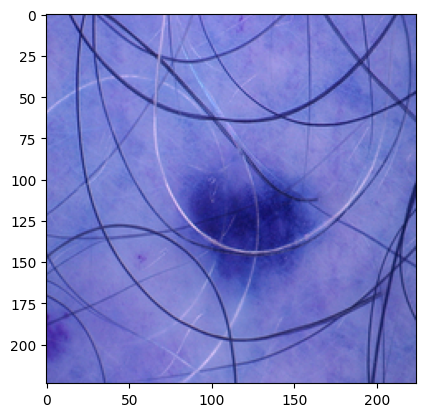

In [23]:
plt.imshow(image)

In [60]:
pca = PCA(70)

#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)  #Volvemos para ver qué información perdemos por el camino
print('red_inverted.shape:', red_inverted.shape)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (224, 70)
red_inverted.shape: (224, 224)
green_transformed.shape: (224, 70)
green_inverted.shape: (224, 224)
blue_transformed.shape: (224, 70)
blue_inverted.shape: (224, 224)


In [61]:
img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

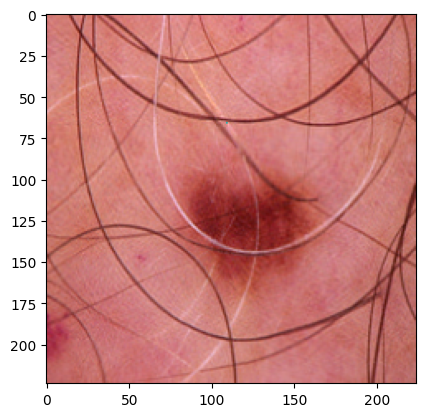

In [62]:
plt.imshow(img_compressed);

In [63]:
(224*70)+(224*70)+(224*70)

47040

In [65]:
224*224

50176

In [87]:
red_oneC = red_transformed.reshape((red_transformed.shape[0]*red_transformed.shape[1]),1)
print('red',red_oneC.shape)
green_oneC = green_transformed.reshape((green_transformed.shape[0]*green_transformed.shape[1]),1)
print('green',green_oneC.shape)
blue_oneC = blue_transformed.reshape((blue_transformed.shape[0]*blue_transformed.shape[1]),1)
print('blue',blue_oneC.shape)

red (15680, 1)
green (15680, 1)
blue (15680, 1)


In [104]:
red_df = pd.DataFrame()
green_df = pd.DataFrame()
blue_df = pd.DataFrame()
df_total = pd.DataFrame()

In [105]:
red_oneC.shape

(15680, 1)

In [106]:
red_df[str(0)]= red_oneC[:,0]
red_df.head()

,0
0,-203.966022
1,39.693832
2,-19.642583
3,-14.667747
4,57.412555


In [107]:
green_df[str(0)]= green_oneC[:,0]
df_total = pd.concat([red_df,green_df],ignore_index=True)
df_total.shape

(31360, 1)

In [108]:
blue_df[str(0)]= blue_oneC[:,0]
df_total = pd.concat([df_total,blue_df],ignore_index=True)
df_total.shape

(47040, 1)

In [109]:
df_total.T

,0,1,2,3,4,5,6,7,8,9,...,47030,47031,47032,47033,47034,47035,47036,47037,47038,47039
0,-203.966022,39.693832,-19.642583,-14.667747,57.412555,-93.140787,43.292007,-27.85083,102.753085,59.47711,...,-12.930355,10.447829,14.696378,9.70539,-4.89256,5.353571,-14.098961,-0.103537,-20.457416,-23.09375


In [112]:
df_color = pd.DataFrame()
df_Total = pd.DataFrame()

df_color[str(0)]= red_oneC[:,0]
df_color[str(1)]= green_oneC[:,0]

In [168]:
df_color1 = pd.DataFrame()
df_color2 = pd.DataFrame()
df_color3 = pd.DataFrame()
df_Total = pd.DataFrame()

df_color1[str(0)]= red_oneC[:,0]
df_color2[str(0)]= green_oneC[:,0]
df_Total = pd.concat([df_color1,df_color2],ignore_index=True)
df_color3[str(0)]= blue_oneC[:,0]
df_Total = pd.concat([df_Total,df_color3],ignore_index=True)
    
df_Total


,0
0,-203.966022
1,39.693832
2,-19.642583
3,-14.667747
4,57.412555
...,...
47035,5.353571
47036,-14.098961
47037,-0.103537
47038,-20.457416


In [39]:
def image_pca(blue,green,red,num):
    pca = PCA(num)
    #Normalizamos los valores
    blue_Norm = blue/255
    green_Norm = green/255
    red_Norm = red/255 
    red_transformed = pca.fit_transform(red_Norm)
    green_transformed = pca.fit_transform(green_Norm)
    blue_transformed = pca.fit_transform(blue_Norm)

    red_oneC = red_transformed.reshape((red_transformed.shape[0]*red_transformed.shape[1]),1)
    green_oneC = green_transformed.reshape((green_transformed.shape[0]*green_transformed.shape[1]),1)
    blue_oneC = blue_transformed.reshape((blue_transformed.shape[0]*blue_transformed.shape[1]),1)
    
    df_color1 = pd.DataFrame()
    df_color2 = pd.DataFrame()
    df_color3 = pd.DataFrame()
    df_Total = pd.DataFrame()

    df_color1[str(0)]= red_oneC[:,0]
    df_color2[str(0)]= green_oneC[:,0]
    df_Total = pd.concat([df_color1,df_color2],ignore_index=True)
    df_color3[str(0)]= blue_oneC[:,0]
    df_Total = pd.concat([df_Total,df_color3],ignore_index=True)
    
    return df_Total
    

In [40]:
#Creamos los paths
malign_data = 'data/raw/train/malignant'
malign_data2 = 'data/raw/test/malignant'
benign_data = 'data/raw/train/benign'
benign_data2 = 'data/raw/test/benign'

#Datasets donde se almacenarán los datos
df_test = pd.DataFrame() 
df_train = pd.DataFrame() 
y_train_values = [] 
y_test_values = []  

count = 0

for img_name in os.listdir(malign_data):
    image = cv2.imread(malign_data+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    blue, green, red = cv2.split(image_sin_vello)    
    df_train[str(count)] = image_pca(blue,green,red,70)
    y_train_values.append(1) # 1 == Malign
    count += 1

for img_name in os.listdir(malign_data2):
    image = cv2.imread(malign_data2+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    blue, green, red = cv2.split(image_sin_vello)
    df_test[str(count)] = image_pca(blue,green,red,70)
    y_test_values.append(1) # 1 == Malign
    count += 1

for img_name in os.listdir(benign_data):
    image = cv2.imread(benign_data+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    blue, green, red = cv2.split(image_sin_vello)
    df_train[str(count)] = image_pca(blue,green,red,70)
    y_train_values.append(0) # 0 = Benign
    count += 1

for img_name in os.listdir(benign_data2):
    image = cv2.imread(benign_data2+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    blue, green, red = cv2.split(image_sin_vello)
    df_test[str(count)] = image_pca(blue,green,red,70)
    y_test_values.append(0) # 0 = Benign
    count += 1

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

MemoryError: Unable to allocate 1.16 MiB for an array with shape (152096,) and data type float64

In [6]:
malign_data = 'data/raw/train/malignant'
malign_data2 = 'data/raw/test/malignant'
benign_data = 'data/raw/train/benign'
benign_data2 = 'data/raw/test/benign'

df_test = pd.DataFrame() #hold the image arrays
df_train = pd.DataFrame() 
y_train_values = []  # hold the image labels
y_test_values = []  # hold the image labels

count = 0

# I save all images to dataframe

for img_name in os.listdir(malign_data):
    image = cv2.imread(malign_data+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    img_gray = cv2.cvtColor(image_sin_vello, cv2.COLOR_BGR2GRAY)
    
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]),1)  # (224*224, 1) = (50176, 1)
    df_train[str(count)] = img_one_column_arr[:,0]
    y_train_values.append(1) # 1 == Malign
    count += 1

for img_name in os.listdir(malign_data2):
    image = cv2.imread(malign_data2+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    img_gray = cv2.cvtColor(image_sin_vello, cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]),1)  # (224*224, 1) = (50176, 1)
    df_test[str(count)] = img_one_column_arr[:,0]
    y_test_values.append(1) # 1 == Malign
    count += 1


for img_name in os.listdir(benign_data):
    image = cv2.imread(benign_data+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    img_gray = cv2.cvtColor(image_sin_vello, cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]), 1)
    df_train[str(count)] = img_one_column_arr[:,0]
    y_train_values.append(0) # 0 = Benign
    count += 1

for img_name in os.listdir(benign_data2):
    image = cv2.imread(benign_data2+"/"+img_name)
    image_sin_vello = eliminar_vello(image)
    img_gray = cv2.cvtColor(image_sin_vello, cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]), 1)
    df_test[str(count)] = img_one_column_arr[:,0]
    y_test_values.append(0) # 0 = Benign
    count += 1

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [7]:
df_train = df_train.T
df_test = df_test.T

In [8]:
df_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,141,138,135,135,134,134,135,136,138,142,...,156,157,158,158,157,157,157,159,161,161
1,80,81,80,80,79,79,81,74,81,86,...,67,61,56,51,56,57,59,59,61,61
2,224,223,220,221,219,218,220,221,222,219,...,234,236,236,234,233,232,233,233,232,232


In [9]:
#Normalizamos
from sklearn.preprocessing import StandardScaler

df_train_Norm = df_train/255
df_test_Norm = df_test/255

In [87]:
type(df_train[0][0])

numpy.uint8

In [85]:
df_train_Norm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,target
0,0.552941,0.541176,0.529412,0.529412,0.525490,0.525490,0.529412,0.533333,0.541176,0.556863,...,0.615686,0.619608,0.619608,0.615686,0.615686,0.615686,0.623529,0.631373,0.631373,1
1,0.313725,0.317647,0.313725,0.313725,0.309804,0.309804,0.317647,0.290196,0.317647,0.337255,...,0.239216,0.219608,0.200000,0.219608,0.223529,0.231373,0.231373,0.239216,0.239216,1
2,0.878431,0.874510,0.862745,0.866667,0.858824,0.854902,0.862745,0.866667,0.870588,0.858824,...,0.925490,0.925490,0.917647,0.913725,0.909804,0.913725,0.913725,0.909804,0.909804,1


In [35]:
'''Aplicamos PCA'''
pca = PCA(n_components=200)
pca.fit(df_train_Norm)

X_train_pca = pca.transform(df_train_Norm)
X_test_pca = pca.transform(df_test_Norm)
X_train_pca.shape

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(2637, 200)

In [34]:
pca.explained_variance_ratio_.cumsum()[200]

0.9797338361616801

In [22]:

#Normalizado
# df_train_Norm['target'] = y_train_values
# df_test_Norm['target'] = y_test_values

### Entrenar el modelo

In [13]:
# X = df_train_Norm.iloc[:,:-1]
# y = df_train_Norm['target']

# test = df_test_Norm.iloc[:,:-1]
# y_true = df_test_Norm['target']

In [ ]:
#Guardar el test
#df = df_test.rename(columns={'target':'class'})
#df.to_csv('test.csv')

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import pickle

In [77]:
class df_Norm():
    def __init__(self):
        self.df_Norm = self[0]/255    

In [82]:
#Entrenamos uno con todos los datos
pipe1 = Pipeline(steps = [
                # ('normalization',df_Norm()),
                ('pca', PCA(n_components=200)),
                ('model', RandomForestClassifier(n_estimators=100,n_jobs=-1))
])
pipe1.fit(df_train_Norm,y_train_values)

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Pipeline(steps=[('pca', PCA(n_components=200)),
                ('model', RandomForestClassifier(n_jobs=-1))])

In [83]:
y_pred_1 = pipe1.predict(df_test_Norm)

print('Accuracy test',pipe1.score(df_test_Norm,y_test_values))
print('Recall test',recall_score(y_test_values,y_pred_1))

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy test 0.9181818181818182
Recall test 0.96


In [84]:
confusion_matrix(y_test_values,y_pred_1)

array([[318,  42],
       [ 12, 288]], dtype=int64)

In [37]:
y_pred_1 = pipe1.predict(X_test_pca)

print('Accuracy test',pipe1.score(X_test_pca,y_test_values))
print('Recall test',recall_score(y_test_values,y_pred_1))

Accuracy test 0.9227272727272727
Recall test 0.96


In [38]:
confusion_matrix(y_test_values,y_pred_1)

array([[321,  39],
       [ 12, 288]], dtype=int64)

In [195]:
y_pred_1 = pipe1.predict(test)

print('Accuracy test',pipe1.score(test,y_true))
print('Recall test',recall_score(y_true,y_pred_1))

Accuracy test 0.7666666666666667
Recall test 0.84


In [196]:
confusion_matrix(y_true,y_pred_1)

array([[254, 106],
       [ 48, 252]], dtype=int64)